# Import libraries

In [1]:
import pandas as pd

In [23]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.rcParams["text.usetex"] = False
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["font.family"] = "Latin Modern Roman"

# Import data

In [66]:
df = pd.read_csv("../../data/input/fifteen-puzzle-6M.csv")

In [67]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,cost
0,10,1,5,4,14,11,15,7,0,9,3,2,6,8,12,13,48
1,1,7,12,2,5,0,6,3,9,8,14,4,13,11,10,15,26
2,6,9,4,1,13,0,12,10,7,5,11,14,3,15,8,2,54
3,15,5,0,6,9,4,8,11,10,13,2,1,12,3,14,7,54
4,6,7,12,4,0,15,11,3,13,10,1,5,9,14,8,2,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999995,14,0,3,9,1,15,10,8,6,4,12,2,5,7,11,13,49
5999996,2,3,5,9,8,0,11,4,6,15,14,7,1,13,10,12,40
5999997,1,5,11,0,4,15,8,12,3,6,14,7,13,2,10,9,51
5999998,9,4,0,8,14,6,12,7,11,2,1,3,5,13,10,15,42


# EDA

## Collected cost data

In [68]:
print("Maximum cost:", max(df["cost"]))
print("Minimum cost:", min(df["cost"]))

Maximum cost: 72
Minimum cost: 0


In [69]:
len(df)

6000000

In [70]:
cost = df["cost"].value_counts().reset_index()
cost.columns = ["cost", "frequency"]
cost = cost.sort_values(by="cost").reset_index(drop=True)

cost

,cost,frequency
0,0,149
1,1,452
2,2,1052
3,3,2353
4,4,4830
...,...,...
68,68,153
69,69,60
70,70,18
71,71,10


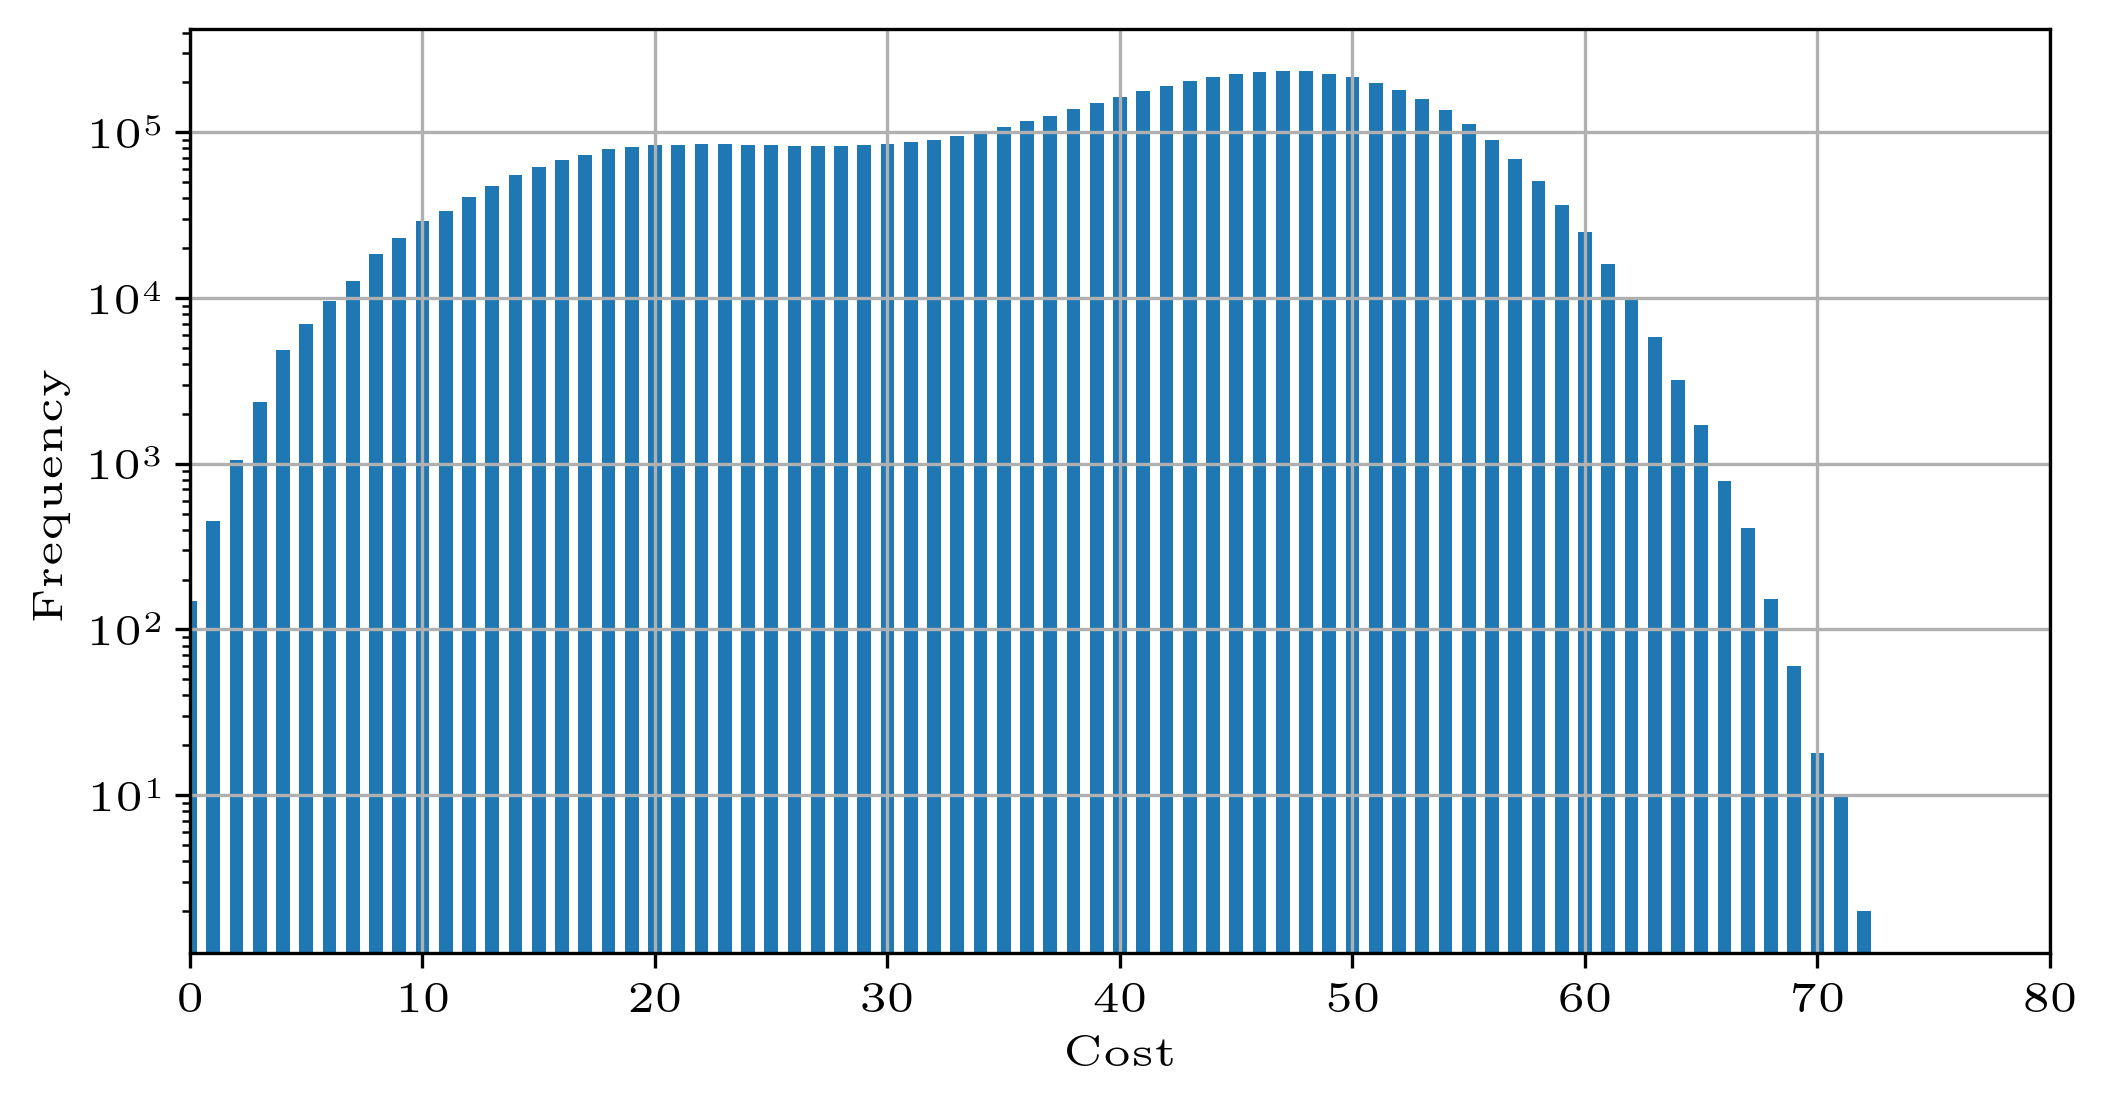

In [71]:
plt.figure(figsize=(8, 4), dpi=300)
plt.bar(cost["cost"], cost["frequency"], align="center", width=0.6)
plt.xlabel("Cost")
plt.xlim(0, 80)
plt.ylabel("Frequency")
plt.yscale("log")

plt.grid(True)
plt.show()

In [72]:
# Find duplicate rows based on all columns and get unique 'cost' values
duplicate_costs = df[df.duplicated(keep=False)]["cost"].unique()

# Display the list of 'cost' values with duplicate rows
print(sorted(duplicate_costs.tolist()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


In [73]:
df = df.drop_duplicates()
len(df)

5624433

In [74]:
cost = df["cost"].value_counts().reset_index()
cost.columns = ["cost", "frequency"]
cost = cost.sort_values(by="cost").reset_index(drop=True)

cost

,cost,frequency
0,0,1
1,1,2
2,2,4
3,3,10
4,4,24
...,...,...
68,68,153
69,69,60
70,70,18
71,71,10


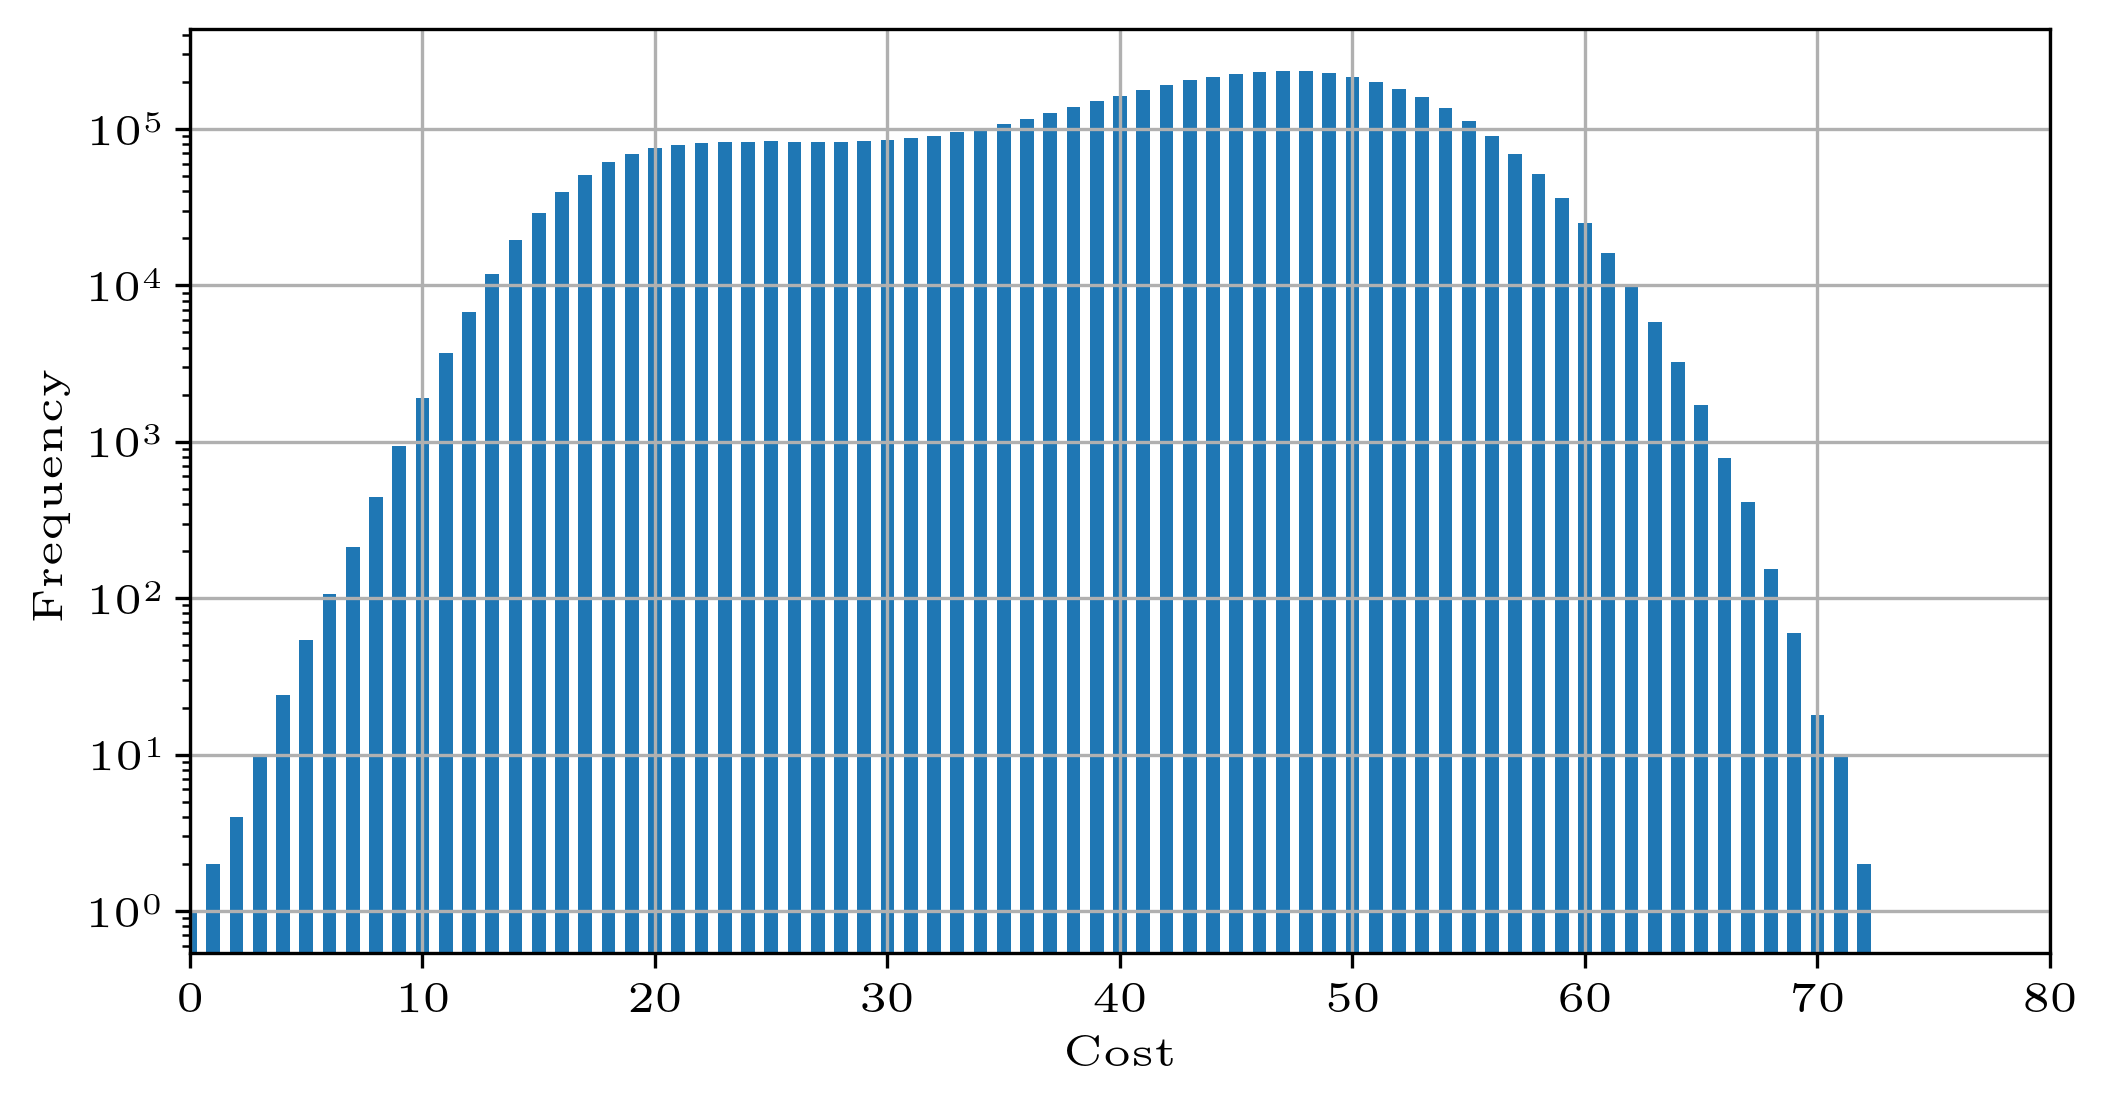

In [75]:
plt.figure(figsize=(8, 4), dpi=300)
plt.bar(cost["cost"], cost["frequency"], align="center", width=0.6)
plt.xlabel("Cost")
plt.xlim(0, 80)
plt.ylabel("Frequency")
plt.yscale("log")

plt.grid(True)
plt.show()

In [82]:
for i in range(11):
    print(i, cost.iloc[i, cost.columns.get_loc("frequency")])


0 1
1 2
2 4
3 10
4 24
5 54
6 107
7 212
8 446
9 937
10 1905


## Full cost frequency

In [76]:
cost_full = pd.read_csv("../../data/input/fifteen-puzzle-costs.csv")

In [77]:
cost_full

,cost,frequency
0,0,1
1,1,2
2,2,4
3,3,10
4,4,24
...,...,...
76,76,272198
77,77,26638
78,78,3406
79,79,70


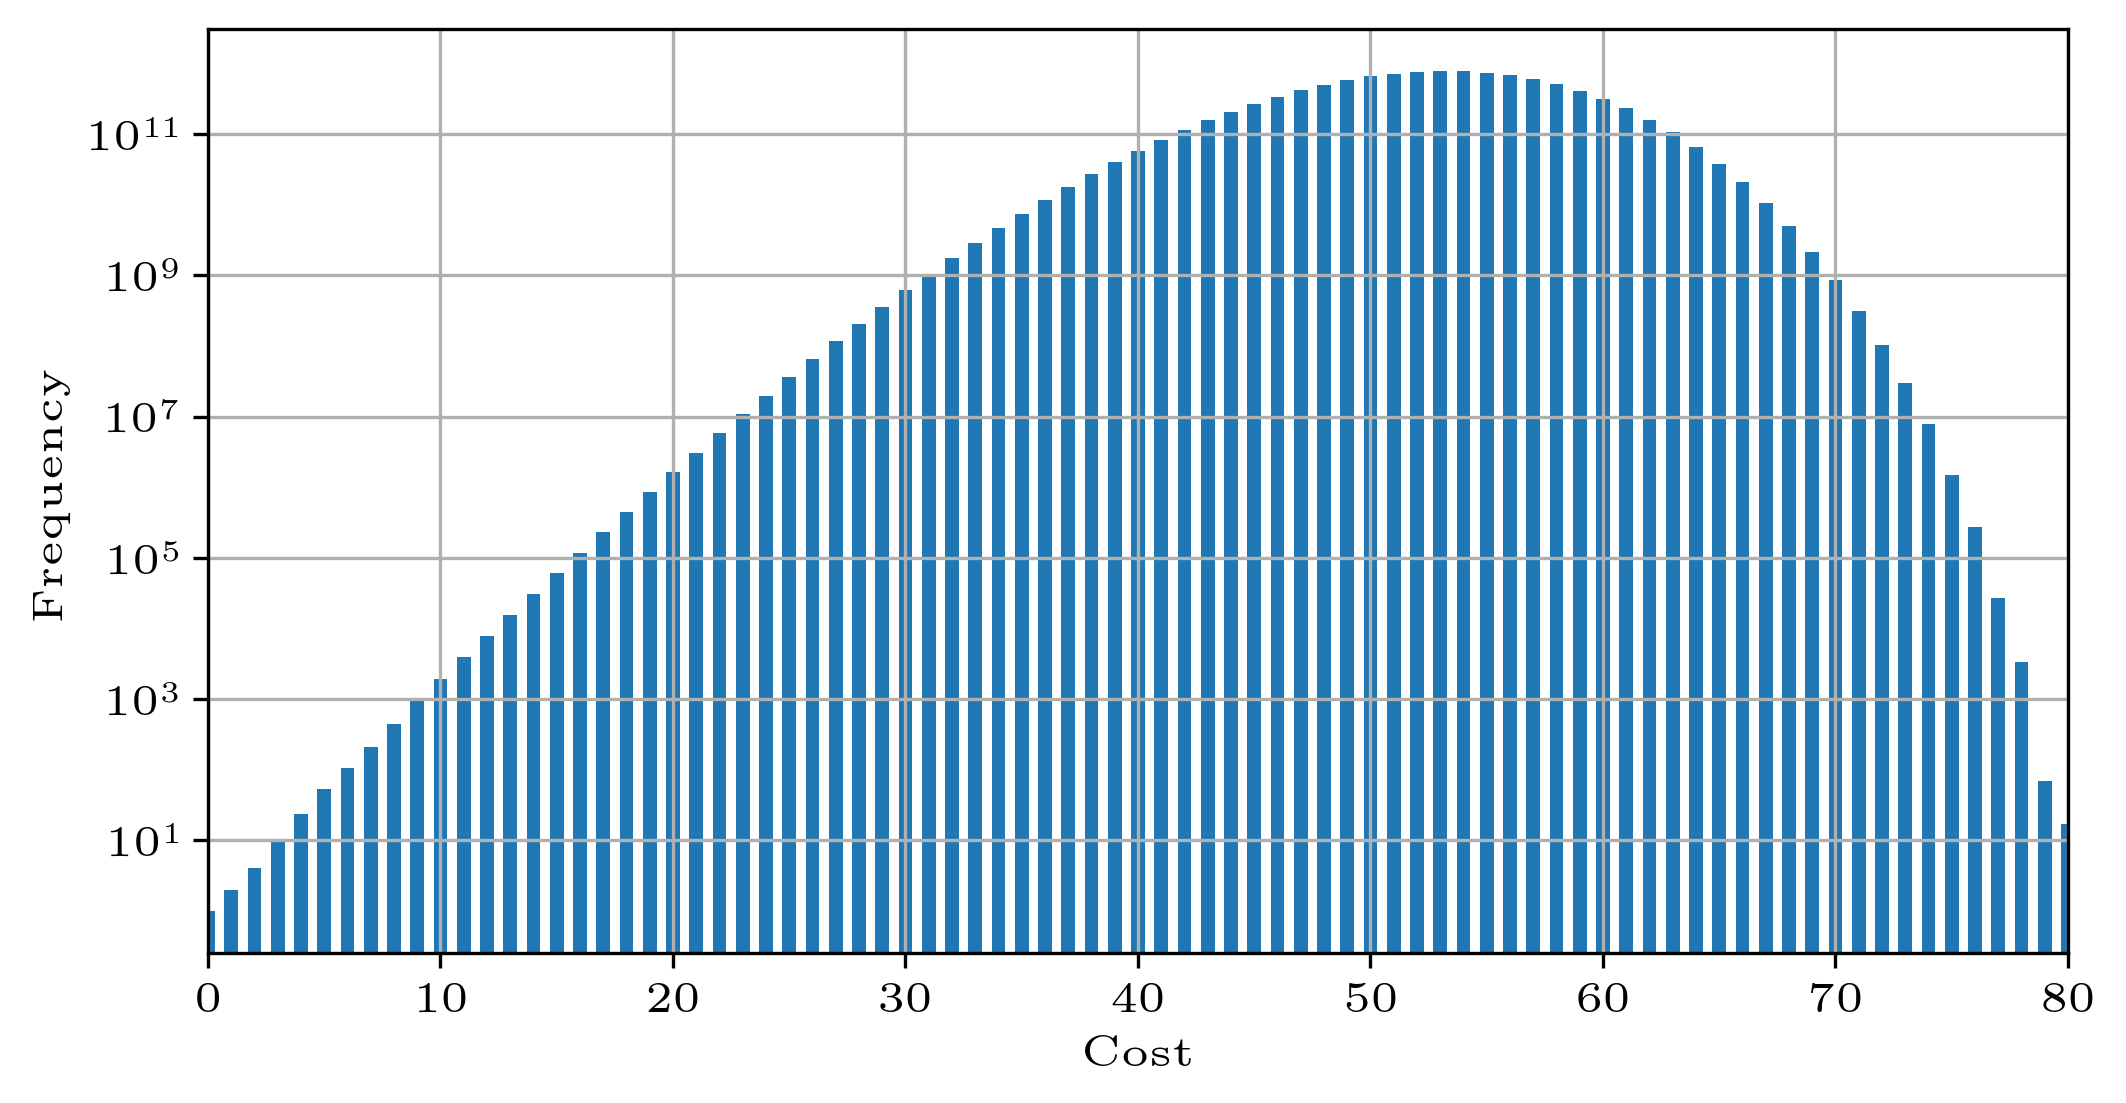

In [78]:
plt.figure(figsize=(8, 4), dpi=300)
plt.bar(cost_full["cost"], cost_full["frequency"], align="center", width=0.6)
plt.xlabel("Cost")
plt.xlim(0, 80)
plt.ylabel("Frequency")
plt.yscale("log")

plt.grid(True)
plt.show()

In [ ]:
for i in range(11):
    print()